# Analiza ocen profesorjev

#### Z analizo bomo preverili hipoteze, ki smo si jih zadali v začetku projektne naloge.

Najprej uvozimo potrebne knjižnice in tabelo s podatki, ki jih bomo obdelali.

In [1]:
import pandas as pd
import statistics as st
%matplotlib inline

ocene = pd.read_csv("ocene_tabela.csv", index_col='id')

ocene

,ime,fakulteta,univerza,predmeti,st_ocen,ocena
id,,,,,,
0,Bavdek Dušan,Akademija za glasbo,Univerza v Ljubljani,"['Solfeggio', 'Harmonija', 'Kompozicija']",65,4.1
1,Bešlić Halid,Akademija za glasbo,Univerza v Ljubljani,['Solfeggio'],7,4.4
2,Bonin Matej,Akademija za glasbo,Univerza v Ljubljani,[''],2,5.0
3,Cerc Rudolf,Akademija za glasbo,Univerza v Ljubljani,[''],3,2.3
4,Drevenšek Matjaž,Akademija za glasbo,Univerza v Ljubljani,['Saksofon'],1,4.0
...,...,...,...,...,...,...
3198,Rotar Pavlič Danica,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,[''],1,5.0
3199,Rotovnik Kozjek Nada,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Klinična prehrana II'],2,5.0
3200,Čuk Vesna,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Supervizija'],13,1.8


### Hipoteze

#### Hipoteza: Študenti katere izmed treh slovenskih univerz je najbolj zadovoljni s profesorji?

Generiramo tabelo s 2 stolpcema, kjer je 1. stolpec ime univerze, 2. stolpec pa povprečna ocena vseh profesorjev iz dane univerze

In [2]:
povprecja_po_un = {"univerza" : [], "povprecje" : []}
un = set((ocene["univerza"]))
for u in un:
    pof = ocene[ocene.univerza == u]
    pof = pof[pof.st_ocen > 0]
    povprecja_po_un["univerza"].append(u)
    povprecja_po_un["povprecje"].append(st.mean(pof["ocena"]))

povp_ocene_univerz = pd.DataFrame.from_dict(povprecja_po_un)
round(povp_ocene_univerz, 2)

,univerza,povprecje
0,Univerza v Ljubljani,3.37
1,Univerza v Mariboru,3.29
2,Univerza na Primorskem,3.34


#### Zaključek hipoteze
Vidimo, da so povprečno najboljše ocenjenjeni profesorji iz Univerze v Ljubljani, vidimo pa da razlika ni velika, saj je razlika med najboljše ocenjeno in najslabše ocenjeno univerzo le približno 0.08, tako da lahko iz tega lahko sklepamo da zadovoljnost študentov v splošnem ni preveč odvisna od univerze same.

#### Hipoteza: Študenti katere fakultete so najbolj zadovoljni in študenti katere fakultete se najraje pritožujejo?

Podobno kot prej generiramo tabelo(ki jo dodatno še uredimo po povprečni oceni), le da ima tokrat 3 stoplce, ker moramo za vsako fakulteto povedati še ime univerze, s katere je ta fakulteta, saj imata fakulteti lahko enako ime(npr. fakulteta za strojništvo v Ljubljani in Fakulteta za strojništvo v Mariboru).

V računanju upoštevamo profesorja samo če ima več kot 5 glasov, saj zaradi premajhnega vzorca podatkov bi bili podatki nereprezentativni.

Za lažjo predstavo generiramo še stolpični diagram.

Opomba: Še ponekod naprej bomo upoštevali le podatke kjer je bilo več kot 5 glasov. Poleg nereprezentativnosti zaradi velikosti se s tem tudi poskušamo čim bolj izogniti nepridipravom, ki so na strani (ki jih lahko ureja vsak) dodali profesorje, ki ne obstajajo (primer recimo stran Pravne fakultete v Mariboru: http://www.profesorji.net/fakulteta/pf/uni ) ali na kak drug način 'kvarili' zajete podatke. 

,fakulteta,univerza,povprecje
40,Pedagoška fakulteta,Univerza na Primorskem,3.93
22,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,3.76
1,"Akademija za gledališče, radio, film in televi...",Univerza v Ljubljani,3.75
23,"Fakulteta za matematiko, naravoslovje in infor...",Univerza na Primorskem,3.65
6,Fakulteta za Logistiko,Univerza v Mariboru,3.60
19,Fakulteta za kemijo in kemijsko tehnologijo,Univerza v Mariboru,3.60
26,Fakulteta za računalništvo in informatiko,Univerza v Ljubljani,3.58
44,Teološka fakulteta,Univerza v Ljubljani,3.56
8,Fakulteta za Turizem,Univerza v Mariboru,3.56
11,Fakulteta za elektrotehniko,Univerza v Ljubljani,3.52


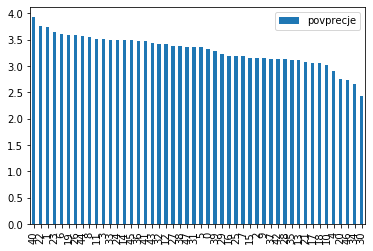

In [3]:
povprecja_po_fak = {"fakulteta" : [], "univerza" : [], "povprecje" : []}

pd.DataFrame.from_dict(povprecja_po_fak).sort_values(["povprecje"] )
for e in ocene.groupby(["fakulteta","univerza"]).count().index: #Zanka po vseh fakultetah
    pof = ocene[(ocene.fakulteta == e[0]) & (ocene.univerza == e[1])]
    pof = pof[pof.st_ocen > 5] #Gledamo samo profesorje z več kot 5 ocenami 
    if len(pof) != 0: #V primeru da ni profesorjev z več kot 5 glasovi, fakultete ne upoštevamo
        povprecja_po_fak["fakulteta"].append(e[0])
        povprecja_po_fak["univerza"].append(e[1])
        povprecja_po_fak["povprecje"].append(st.mean(pof["ocena"]))
        
povp_ocene_fakultet = pd.DataFrame.from_dict(povprecja_po_fak).sort_values(["povprecje"], ascending=False)
povp_ocene_fakultet.plot.bar()
round(povp_ocene_fakultet, 2)

#### Zaključek hipoteze
Prve 3 fakultete na katerih so študenti z profesorji najbolj zadovoljni so Pedagoška fakulteta iz primorske z (povprečno) oceno 3.93, Fakulteta za matematiko in fiziko v Ljubljani(za katero lahko zadovoljstvo študentov tudi sam potrdim) z oceno 3.76 in AGRFT v Ljubljani z oceno 3.75.

3 fakultete na katerih so študenti najmanj zadovoljni s profesorji pa so Fakulteta za turistične študije Portorož - TURISTICA iz primorske z oceno 2.43, Fakulteta za šport v Ljubljani z oceno 2.65 in Visoka šola za zdravstvo Izola (Fakulteta za vede o zdravju Izola) iz primorske z oceno 2.73.

#### Hipoteza: Ali obstaja povezava med višino ocene in številom ocen?

Generiramo graf, ki prikazuje oceno profesorja, v odvisnosti od števila ocen. Spet vzamemo le profesorje, ocenjene več kot 5-krat.

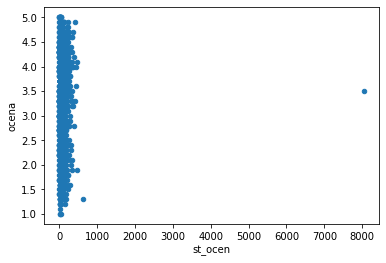

In [4]:
ocene[ocene.st_ocen > 5].plot.scatter("st_ocen", "ocena")

Vidimo da obstaja profesor ki je bil mnogo večkrat ocenjen kot vsi drugi.

In [5]:
ocene[ocene.st_ocen > 1000]

,ime,fakulteta,univerza,predmeti,st_ocen,ocena
id,,,,,,
1824,Vogler Andrej,Medicinska fakulteta,Univerza v Ljubljani,[''],8041,3.5


Vidimo da je profesor medicinske fakultete Andrej Vogler bil ocenjen v času izdelave projektne naloge kar 8041-krat. Glede na to da noben drug profesor ni bil ocenjen več kot 1000-krat si lahko mislimo, da je za to kriv kakšen prej omenjen nepridiprav. Poleg tega vidimo, če pogledamo njegov profil na strani, da je njegov profil poln 'spam' komentarjev, večina od katerih ni primerna za mladoletne osebe, kar le potrdi naš sum.

Ponovno izdelamo graf vendar profesorja Andreja Voglerja izpustimo.

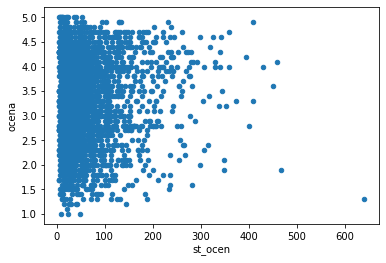

In [6]:
ocene[(ocene.st_ocen > 5) & (ocene.st_ocen < 1000)].plot.scatter("st_ocen", "ocena")

#### Zaključek hipoteze:
Vidimo da je nekaj korelacije. Vidimo da je pri manjšem številu ocen več profesorjev z zelo nizko povprečno oceno kot je profesorjev z zelo nizko oceno, ki so bili večkrat ocenjeni. Razlog za to bi lahko bil, ker pogosto ocenjujejo samo študenti, ki svoje frustracije projecirajo na profesorja, ocena pa je bolj primerna ko ocenjujejo vsi študenti, ne le 'zafrustrirani'.

#### Če profesor poučuje na večih fakultetah, ali obstaja povezava med ocenami?

Pogledali bomo če so študenti iz različnih fakultet z istim profesorjem različno zadovoljni. Izračunali bomo koliko se v povprečju razlikuje ocena profesorja na različnih fakultetah. To bomo merili tako da bomo razliko ocen profesorja izračunali po formuli $ f(S) = \max\limits_{x \in S}\{(\sum_{x'\in S} \frac{x'}{|S|}) - x\} $, torej maksimalna razlika med povprečjem in posameznimi vrednostmi.

In [7]:
prof = ocene.groupby(["ime"]).count()
prof = list(prof[prof.ocena > 1].index)
def metrika(s) : return max([abs(st.mean(s)-i) for i in s])
s = 0
for p in prof:
    t = ocene[ocene.ime == p]
    o = metrika(list(t["ocena"]))
    s += o
print(round(s/len(prof),2))

0.38


#### Zaključek hipoteze:
Povprečna razlika je 0.38. Razlika ni preveč velika, vendar pa vseeno nezanemarljiva. Razlogov za to je lahko več, npr.: profesor ima stil poučevanja, ki je bolj primeren za 1 fakulteto, različna zahtevnost predmetov in posledično različno zadovoljstvo študentov, ...

Moremo pa opozoriti da je vzorec precej majhen, in zato nemoremo narediti preveč velikih sklepanj.

In [8]:
print(len(prof))

41


Vidimo da je profesorjev, ki učijo na več kot 1 fakulteti v podatkih le 41.

#### Hipoteza: Ali obstaja povezava med številom predmetov in številom ocen?

V tabelo dodamo število predmetov in narišemo graf. Ker nekateri profesorji nimajo na strani napisanega nobenega predmeta, gledamo samo tiste, ki imajo kak predmet vpisan.

In [9]:
import ast
x =list(ocene["predmeti"])
pred = list(map(ast.literal_eval, x))
pred = [[] if s == [''] else s for s in pred]
st_pred = [len(s) for s in pred]
ocene["st_pred"] = st_pred
ocene[(ocene.st_ocen > 5) & (ocene.st_pred > 0)]

,ime,fakulteta,univerza,predmeti,st_ocen,ocena,st_pred
id,,,,,,,
0,Bavdek Dušan,Akademija za glasbo,Univerza v Ljubljani,"['Solfeggio', 'Harmonija', 'Kompozicija']",65,4.1,3
1,Bešlić Halid,Akademija za glasbo,Univerza v Ljubljani,['Solfeggio'],7,4.4,1
7,Grafenauer Andrej,Akademija za glasbo,Univerza v Ljubljani,['Kitara'],10,4.6,1
8,Horak Marina,Akademija za glasbo,Univerza v Ljubljani,['Dimenzije izvajanja'],30,3.1,1
9,Kacjan Aleš,Akademija za glasbo,Univerza v Ljubljani,['Komorna igra'],50,3.7,1
...,...,...,...,...,...,...,...
3190,Coer Andrej,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,"['Anatomija', 'Patologija']",19,3.7,2
3191,Jenko Pražnikar Zala,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Biokemija'],8,3.2,1
3192,Jurdana Mihaela,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Biofizika'],12,2.1,1


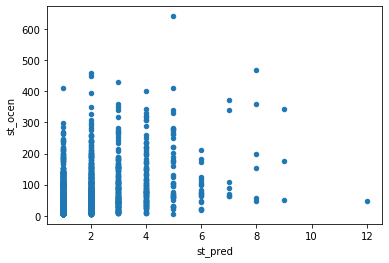

In [10]:
ocene[(ocene.st_ocen > 5) & (ocene.st_pred > 0)].plot.scatter("st_pred", "st_ocen")

#### Zaključek hipoteze:
Iz grafa vidimo, da ni pretirane korelacije. Vendar pa si, ker veliko profesorjev nima dodanega nobenega predmeta, lahko mislimo da bi bili rezultati lahko precej različni, če bi bili bolj natančni podatki, zato nam ta ugotovitev ne pove kaj dosti.

### Dodatni rezultati
S tem smo dobili odgovore na vse hipoteze, toda za konec si oglejmo še 2 zanimiva rezultata.

#### Najbolje ocenjeni profesorji FMF-ja
Poglejmo si še najboljše ocenjene profesorje iz naše fakultete, in za to si ogledamo tabelo.

In [16]:
ocene[(ocene.fakulteta == "Fakulteta za matematiko in fiziko") & (ocene.st_ocen > 5)].sort_values(["ocena"], ascending=False)

,ime,fakulteta,univerza,predmeti,st_ocen,ocena,st_pred
id,,,,,,,
909,Kališnik Jure,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,"['Izbrana poglavja iz matematike', 'Analiza II...",410,4.9,5
863,Anžiček Jasmin,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,[''],130,4.9,0
899,Hajšen Matic Oskar,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,['Računalniški praktikum'],16,4.9,1
961,Pretnar Matija,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,"['Logika in množice', 'Uvod v programiranje', ...",55,4.8,3
870,Bašić Nino,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,"['Uvod v programiranje', 'Programiranje 1', 'R...",50,4.8,9
...,...,...,...,...,...,...,...
936,Mohar Bojan,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,[''],16,1.9,0
948,Petelin Andrej,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,[''],25,1.8,0
933,Mavko Borut,Fakulteta za matematiko in fiziko,Univerza v Ljubljani,[''],11,1.8,0



Vidimo da so najboljše ocenjeni profesorji naslednji: Kališnik Jure, Anžiček Jasmin, Hajšen Matic Oskar, Pretnar Matija(za katerega lahko zadovoljstvo študentov spet tudi sam potrdim) in Bašić Nino.

#### Najbolje ocenjen profesor iz Visoke šole za zdravstvo Izola (Fakulteta za vede o zdravju Izola)
Za zadnje dejanje projektne naloge si kot zanimivost oglejmo še najbolše ocenjenega profesorja Visoke šole za zdravstvo Izola (Fakulteta za vede o zdravju Izola), kot primer zanesljivosti podatkov iz zajete spletne strani.

In [26]:
ocene[(ocene.fakulteta == "Visoka šola za zdravstvo Izola (Fakulteta za vede o zdravju Izola)") & (ocene.st_pred > 0)].sort_values(["ocena"], ascending=False)

,ime,fakulteta,univerza,predmeti,st_ocen,ocena,st_pred
id,,,,,,,
3197,Ronaldo Dos Santos Aveiro Cristiano,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Fuzbal'],2,5.0,1
3199,Rotovnik Kozjek Nada,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Klinična prehrana II'],2,5.0,1
3194,Kovač Boris,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,"['Pridelava živil', 'Predelava živil']",5,4.8,2
3190,Coer Andrej,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,"['Anatomija', 'Patologija']",19,3.7,2
3202,Žvanut Boštjan,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,"['Uvod v raziskovalno delo', 'Informatika v zd...",31,3.7,2
3191,Jenko Pražnikar Zala,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Biokemija'],8,3.2,1
3192,Jurdana Mihaela,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Biofizika'],12,2.1,1
3200,Čuk Vesna,Visoka šola za zdravstvo Izola (Fakulteta za v...,Univerza na Primorskem,['Supervizija'],13,1.8,1


Vidimo da je najboljše ocenjen Cristiano Ronaldo, ki uči predmet Fuzbal. 

### Zaključek
Ugotovitve hipotez:
* Študenti so v povprečju pribložno enako zadovoljni ne glede na Univerzo
* S profesorji so najbolj so zadovoljni študenti PF iz primorske, AGRFT-ja in FMF-ja
* Obstaja majhna povezava med številom ocen in višino povprečne ocene
* Če profesor poučuje na različnih fakultetah se mu ocena v povprečju malo, vendar ne zanemarljivo malo spremeni
* Med številom ocen in številom predmetov ni korelacije

Opomnimo pa še to, da zaradi ponekod majhnega vzorca ter raznih nepridipravov (katerih primere smo tudi videli v analizi) rezultati analize niso najbolj zanesljivi in so seveda bolj zanesljivi podatki internih anket fakultet kot pa podatki iz spletne strani http://www.profesorji.net iz katere smo zajeli podatke, ki jo lahko ureja vsak.